## Mechanical Properties from Stress-Strain Curves

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline

In [2]:
%ls

ABS_HIPS_plot_with_error_bars.png
Al60601_raw_data.xls
bar_plot_with_error_bars.ipynb
calculate-yield-strength-programmatically.ipynb
images/
mechanical-properties-from-stress-strain-curves.ipynb
mechanical-properties-intro.md
plotting-stress-strain-curves.ipynb
Steel1018_raw_data.xls
stress-strain_curve.png
stress_strain_curve_with_inset_elastic_region.ipynb
stress_strain_curve_with_inset.png


In [3]:
df_al = pd.read_excel('Al60601_raw_data.xls')
df_al.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,542,1,8.470,0.02256,201.146011,-0.001444,0.007552,NaN,NaN,NaN
1,542,2,8.632,0.02330,206.599442,0.000302,0.007552,NaN,NaN,NaN
2,542,3,10.027,0.02846,287.512573,0.003044,0.018898,NaN,NaN,NaN
3,542,4,11.031,0.03232,365.380981,0.009881,0.022061,NaN,NaN,NaN
4,542,5,11.928,0.03616,447.813965,0.014085,0.033652,NaN,NaN,NaN


In [4]:
df_steel = pd.read_excel('Steel1018_raw_data.xls')
df_steel.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,523,1,6.189,0.07302,202.924728,0.000402,-0.028272,NaN,NaN,NaN
1,523,2,6.549,0.07396,205.714890,-0.000238,-0.034549,NaN,NaN,NaN
2,523,3,7.148,0.07624,217.763336,-0.000713,-0.030140,NaN,NaN,NaN
3,523,4,9.146,0.08438,316.306122,0.002377,-0.025968,NaN,NaN,NaN
4,523,5,10.041,0.08822,417.003357,0.003089,-0.024100,NaN,NaN,NaN


In [5]:
d = 0.506
r = d/2
A = np.pi*r**2

stress_al = (df_al['FORCE']/A)*0.001
strain_al = df_al['CH5']*0.01

stress_steel = (df_steel['FORCE']/A)*0.001
strain_steel = df_steel['CH5']*0.01

### Plot the full stress strain curve

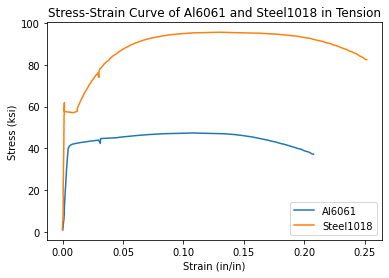

In [6]:
fig,ax = plt.subplots()
ax.plot(strain_al, stress_al)
ax.plot(strain_steel, stress_steel)
ax.set_xlabel('Strain (in/in)')
ax.set_ylabel('Stress (ksi)')
ax.set_title('Stress-Strain Curve of Al6061 and Steel1018 in Tension')
ax.legend(['Al6061','Steel1018'])

plt.show()

### Calculate tensile strength

In [7]:
# Calculate the tensile strength
ts_al = np.max(stress_al)
ts_steel = np.max(stress_steel)
print(f'The tensile strength of Al6061 is: {round(ts_al,1)} ksi')
print(f'The tensile strength of Steel1018 is: {round(ts_steel,1)} ksi')

The tensile strength of Al6061 is: 47.3 ksi
The tensile strength of Steel1018 is: 95.5 ksi


### Caclulate elastic modulus

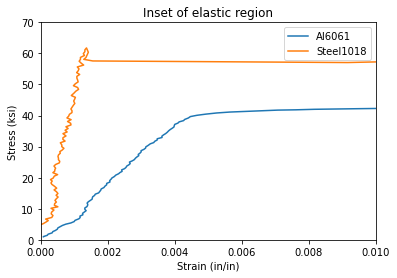

In [8]:
fig,ax = plt.subplots()
ax.plot(strain_al, stress_al)
ax.plot(strain_steel, stress_steel)

ax.set_title('Inset of elastic region')
ax.set_xlabel('Strain (in/in)')
ax.set_ylabel('Stress (ksi)')
ax.legend(['Al6061','Steel1018'])

ax.set_xlim([0,0.01])
ax.set_ylim([0,70])

plt.show()

In [9]:
# Find the elastic modulus of Al6061
# use stress and strain values from stress=0 to stress=35 ksi
linear_stress_al_mask = stress_al < 35
linear_stress_al = stress_al[linear_stress_al_mask]
linear_strain_al = strain_al[linear_stress_al_mask]

linear_regression_output = linregress(linear_strain_al, linear_stress_al)
E_al = linear_regression_output[0]

print(f'The elastic modulus of Al6061 is {round(E_al,1)} ksi')

The elastic modulus of Al6061 is 9909.4 ksi


In [10]:
# Find the elastic modulus of Steel1018
# use stress and strain values from stress=0 to stress=55 ksi
linear_stress_steel_mask = stress_steel < 55
linear_stress_steel = stress_steel[linear_stress_steel_mask]
linear_strain_steel = strain_steel[linear_stress_steel_mask]

linear_regression_output_steel = linregress(linear_strain_steel, linear_stress_steel)
E_steel = linear_regression_output_steel[0]

print(f'The elastic modulus of Steel1018 is {round(E_steel,1)} ksi')

The elastic modulus of Steel1018 is 40125.4 ksi


### Calculate ductility

The ductility of a metal is calculated from a stress strain curve by drawing a line down from the fracture point on the curve, parallel to the linear elastic region. Where that line crosses the strain axis is the ductility.

Point-Slope Formula for a line:

$$ y - y_1 = m(x-x_1) $$

Where $m=$ slope in the linear elastic region (elastic modulus), $x_1=$ last strain point on the stress strain curve, $y_1 =$ last stress point on the stress strain curve.

Solve the equation above for $x$, when $y=0$ in terms of $x_1$, $x_2$ and $m$.

$$ x = \frac{-y_1}{m}+x_1 $$

Substitue in ductility, elastic modulus $E$, and the last stress and strain points.

$$ \%EL = \frac{-stress_{last}}{E}+strain_{last} $$

In [11]:
# Find the ductility for Al6061
stress_al_array = np.array(stress_al)
stress_al_last = stress_al_array[-1]
strain_al_array = np.array(strain_al)
strain_al_last = strain_al_array[-1]
EL_al = -stress_al_last/E_al + strain_al_last
print(f'The ductility of Al6061 is {round(EL_al*100,1)}%')

The ductility of Al6061 is 20.4%


In [12]:
# Find the ductility of Steel1018
stress_steel_array = np.array(stress_steel)
stress_steel_last = stress_steel_array[-1]
strain_steel_array = np.array(strain_steel)
strain_steel_last = strain_steel_array[-1]
EL_steel = -stress_steel_last/E_steel + strain_steel_last
print(f'The ductility of Steel1018 is {round(EL_steel*100,1)}%')

The ductility of Steel1018 is 25.0%


### Cacluate Yield Strength

The yield strength of a metal is calculated from a stress strain curve by drawing a line parallel to the elastic modulus that goes through the point strain=0.002. Where that line crosses the stress strain curve, that amount of stress is the yield strength

Point-Slope Formula for a line:

$$ y - y_1 = m(x-x_1) $$

Where $m=$ slope in the linear elastic region (elastic modulus, E), $x_1=0.002$, and $y_1 = 0$

Rewrite the equation, where $y=stress_{offset}$ and the elastic modulus and value of $x_1$ and $y_1$ are included.

$$ stress_{offset} = E(strain-0.002) $$

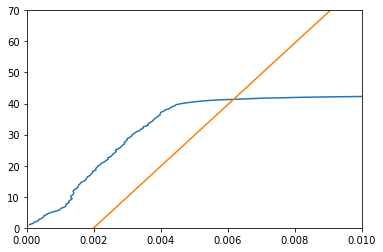

In [13]:
# calculate the yield strength of Al6061
stress_offset_al = E_al*(strain_al_array-0.002)

fig, ax = plt.subplots()

ax.plot(strain_al,stress_al,strain_al,stress_offset_al)
ax.set_ylim([0,70])
ax.set_xlim([0,0.01])

plt.show()

In [14]:
YS_al = 41.3653 # by zooming into the plot that contains the stress strain curve of Al6061 and the offset stress
print(f'The yield strength of Al6061 is {round(YS_al,1)} ksi')

The yield strength of Al6061 is 41.4 ksi


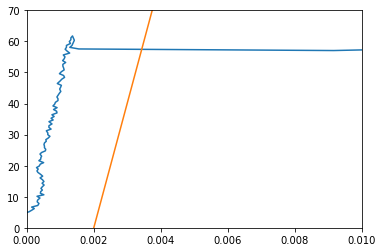

In [15]:
# Calculate the yield strength of Steel1018
stress_offset_steel = E_steel*(strain_steel_array-0.002)

fig, ax = plt.subplots()

ax.plot(strain_steel,stress_steel,strain_steel,stress_offset_steel)
ax.set_ylim([0,70])
ax.set_xlim([0,0.01])

plt.show()

In [16]:
YS_steel = 57.4495 # by zooming into a plot showing the stress strain curve of steel1018 and the offset stress
print(f'the yield strength of steel1018 is {round(YS_steel,1)} ksi')

the yield strength of steel1018 is 57.4 ksi
